# Chapter4. 모델 훈련

## 4.1 선형 회귀

In [2]:
import numpy as np

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
import matplotlib.pyplot as plt

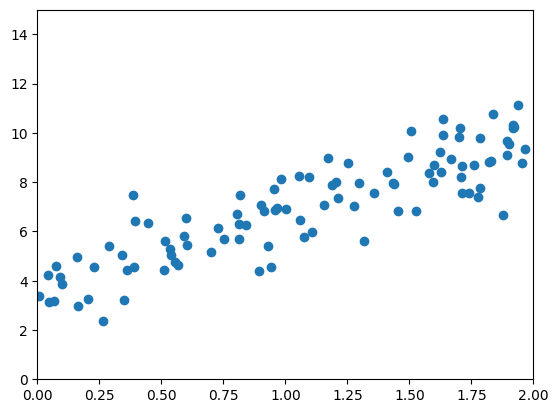

In [5]:
plt.scatter(X, y)
plt.ylim(0, 15)
plt.xlim(0, 2)
plt.show()

In [6]:
# 정규방정식을 통한 최적의 파라미터 구하기

X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.67805372],
       [3.05414223]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.67805372],
       [9.78633817]])

In [8]:
X_new_b

array([[1., 0.],
       [1., 2.]])

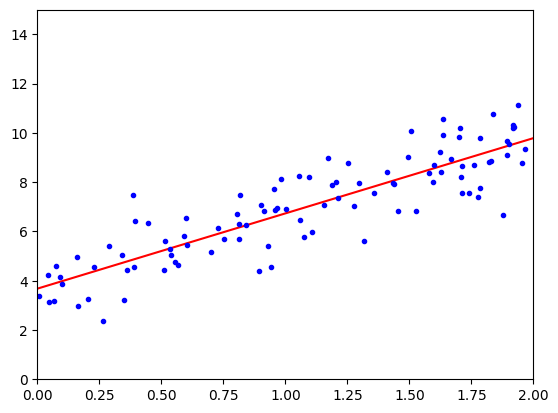

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([3.67805372]), array([[3.05414223]]))

In [13]:
lin_reg.predict(X_new)

array([[3.67805372],
       [9.78633817]])

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.67805372],
       [3.05414223]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[3.67805372],
       [3.05414223]])

시간복잡도
- 정규방정식은 (nx1) x (nx1) 크기의 (X.T)(X)의 역행렬을 계산
- 일반적으로 O(n^2.4) ~ O(n^3)

## 4.2 경사 하강법

In [16]:
eta = 0.1
n_iterations = 100
m = 100

In [17]:
theta = np.random.randn(2, 1)

In [18]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[3.63136925],
       [3.09084881]])

확률적 경사 하강법

In [20]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[3.69198805],
       [3.04750288]])

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.59132383]), array([2.97406903]))

## 4.3 다항 회귀

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

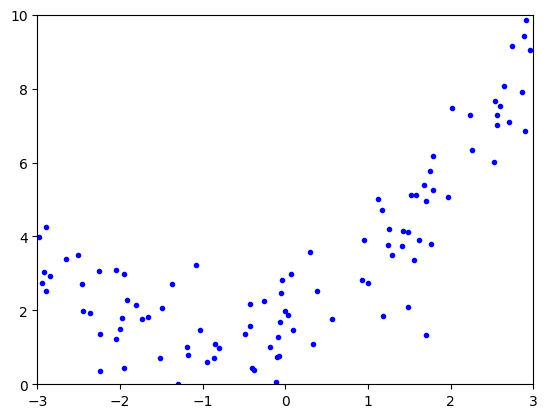

In [25]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([2.56220574]), array([2.56220574, 6.56489826]))

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.64950495]), array([[0.93554773, 0.5126038 ]]))

## 4.4 학습 곡선

훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.xlabel('train set size')
    plt.ylabel('RMSE')
    plt.legend()

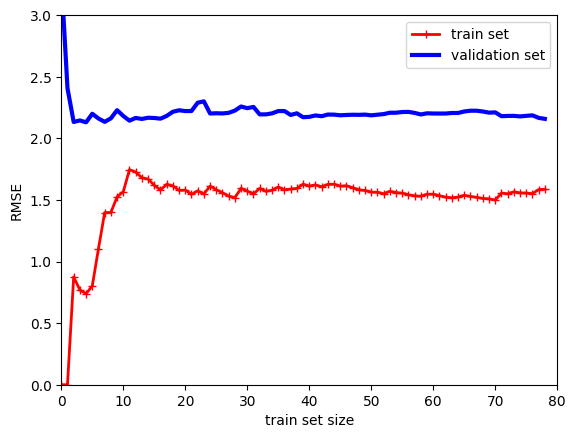

In [29]:
lin_reg = LinearRegression()
plt.axis([0, 80, 0, 3])
plot_learning_curves(lin_reg, X, y)

과소적합 모델
- 2차항의 데이터를 선형에 맞춤
- 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음

In [30]:
# 10차항 다항 회귀 모델
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

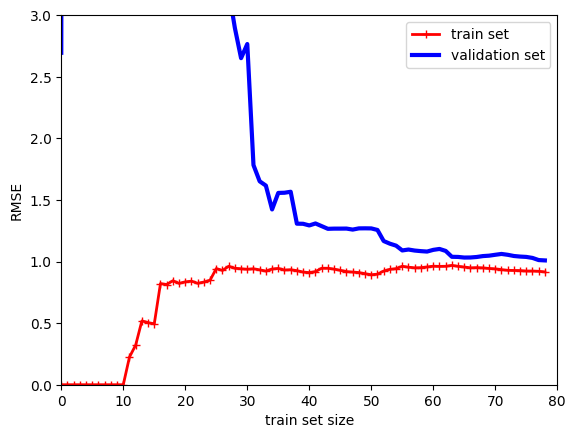

In [31]:
plt.axis([0, 80, 0, 3])
plot_learning_curves(polynomial_regression, X, y)

과대적합 모델
- 훈련데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
- 두 곡선 사이에 공간이 있다. 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫기 때문.
- 과대적합 모델의 개선 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것

일반화 오차의 종류
- 편향 : 잘못된 가정으로 인한 것. 예를 들어, 2차식의 데이터를 선형으로 가정. 편향이 큰 데이터는 과소적합 되기 쉽다.
- 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하게 반응. 고차 다항 회귀 모델 일수록 높은 분산을 가지기 쉽고, 데이터에 과대적합되는 경향을 보인다.
- 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생하는 오차
> 편향 분산 tradeoff
> - 모델의 복잡도가 커질수록 분산 증가, 편향 감소
> - 모델의 복잡도가 작을수록 편향 증가, 분산 감소

## 4.5 규제가 있는 선형 모델

> 규제가 있는 모델은 데이터의 스케일에 민감하므로 스케일을 맞춰주면 좋다

**릿지 회귀**    
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2$
- $\theta_0$는 규제되지 않는다
- $\alpha=0$이면 선형 회귀와 같다
- $\alpha$가 아주 크면 모든 가중치가 0으로 수렴 > 데이터의 평균을 지나는 수평선

**릿지 회귀의 정규방정식**     
$\hat\theta = (X^TX + \alpha A)^{-1} X^Ty$

In [32]:
#정규방정식을 이용한 ridge regresison

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.70403684]])

In [33]:
#경사 하강법에 ridge regression 적용

sgd_reg = SGDRegressor(penalty= "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.67835304])

**라쏘 회귀**    
$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n\vert{\theta_i}\vert$
- 라쏘 회귀는 덜 중요한 특성의 가중치를 제거하려는 특성이 있다. 가중치를 0으로 만듦.
- 희소 모델을 만든다(0이 아닌 특성의 가중치가 적다)

**subgradient vector**   
$g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha \begin{pmatrix}sign(\theta_1)\\sign(\theta_2)\\ \vdots \\sign(\theta_n) \end{pmatrix}$
- Lasso의 비용 함수는 $\theta_i=0$에서 미분이 불가능
- subgradient vector를 적용해서야 경사하강법을 사용할 수 있다

In [34]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.6631521])

In [35]:
sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.68222077])

**elastic net**    
$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^n\vert{\theta_i}\vert + \alpha \frac{1-r}{2} \sum_{i=1}^n \theta_i^2$


In [36]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.6649578])

**Regulation의 선택**

- 규제가 약간 있는 것이 대부분 좋다
- 기본이 ridge
- 쓰이는 특성이 몇 개뿐이라고 의심이 되면 Lasso, Elastic 사용

**Early Stopping**
- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시킴
- 복잡한 모델은 학습이 진행됨에 따라 훈련 에러는 계속 감소, 검증 에러는 어느 순간부터 증가한다.
- 이는 모델이 overfitting되기 때문이며, 이를 막기 위해 early stopping을 한다.

In [38]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

In [45]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [61]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

In [64]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [65]:
best_epoch

970

## 4.6 로지스틱 회귀

> 어떤 회귀 알고리즘은 분류에도 사용할 수 있다.
> 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용

**로지스틱 회귀**   
$\hat{p} = h_\theta(X) = \sigma(\theta^TX)$   
- 선형 회귀와 같이 가중치 합을 계산한 다음, 결괏값의 로지스틱(시그모이드 함수)을 출력

**시그모이드 함수**   
$\sigma(t) = \frac{1}{1+exp(-t)}$
- 0에서 1사이의 값 가짐
$\hat{y} = \begin{cases}
0,\; if\; \hat{p}<0.5\\
1,\; if\; \hat{p}>=0.5
\end{cases}$
- $\theta^TX$가 양수면 p=1, 음수면 p=0

**로지스틱 회귀의 비용함수**    
- 하나의 샘플   
$c(\theta) = \begin{cases}
-log(\hat{p}),\; if\;y=1\\
-log(1-\hat{p}),\; if\; y=0
\end{cases}$
- 전체 훈련 세트   
$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$
- 전체 훈련 세트의 정규방정식은 없다. 이 함수가 볼록함수 임을 이용하여서 경사하강법으로 학습해야한다.
$\dfrac{\partial}{\partial\theta_j}J(\theta) =
\dfrac{1}{m}\sum_{i=1}^m(\sigma(\theta^Tx^{(i)})-y^{(i)})x_j^{(i)}$

In [67]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [72]:
X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"]==2).astype(int) #Iris-Virginica면 1, 그렇지 않다면 0

In [73]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X, y)

LogisticRegression(n_jobs=-1)

In [76]:
X_new= np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

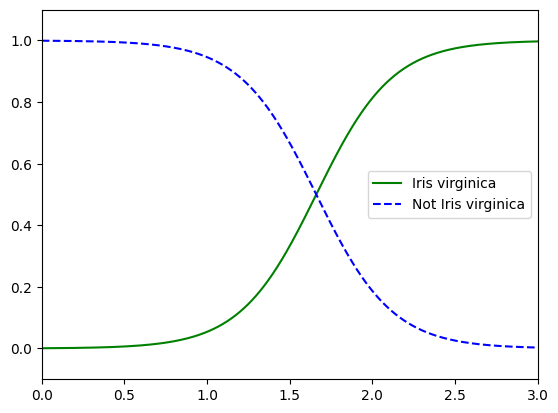

In [79]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.axis([0, 3, -0.1, 1.1])
plt.legend()
plt.show()

x=1.6 정도에서 결정 경계가 만들어진다.

In [81]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

**소프트맥스 회귀(다항 로지스틱 회귀)**   
-샘플 x에 대해 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수$(s_k(x))$ 계산, 그 점수에 소프트맥스 함수 적용하여 각 클래스 별 확률 계산   
$s_k(x) = (\theta^{(k)})^Tx$   
- 각 클래스 마다 파라미터 벡터 $\theta^{(k)}$ 존재, 이들은 파라미터 행렬 $\Theta$에 행으로 저장
- 소프트맥스 함수   
$\hat{p}_k = \sigma(s(x))_k = \dfrac{exp(s_k(x))}{\sum_{j=1}^Kexp(s_j(x))}$   
$\hat{y} = argmax_k((\theta^{(k)})^Tx)$

**소프트맥스 회귀의 비용함수**  
- 크로스 엔트로피 함수   
$J(\theta) = -\dfrac{1}{m}\sum_{i=1}^m\sum_{k=1}^{K}y_k^{(i)}log(\hat{p}_{k}^{(i)})$   
$\nabla_{\theta^{(k)}}J(\Theta) = \dfrac{1}{m}\sum_{i=1}^{m}(\hat{p}_{k}^{(i)}-y_{k}^{(i)})x^{(i)}$

In [82]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

In [84]:
#소프트 맥스 회귀 사용하기
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [87]:
softmax_reg.predict([[5, 2]])

array([2])

In [88]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])